In [43]:
import math, pandas
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append("/home/julian/repositories/flightloganalysis")
from flightjy import utils, loaders


def latlngtoxy(pQ):
    lng0, lat0 = pQ.iloc[0].lng, pQ.iloc[0].lat
    earthrad = 6378137
    nyfac = 2*math.pi*earthrad/360
    exfac = nyfac*math.cos(math.radians(lat0))
    pQ["x"] = (pQ.lng - lng0)*exfac
    pQ["y"] = (pQ.lat - lat0)*nyfac
    return pQ


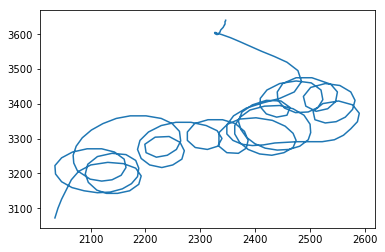

In [49]:
i = pQ.iloc[560:]
plt.plot(i.x, i.y)

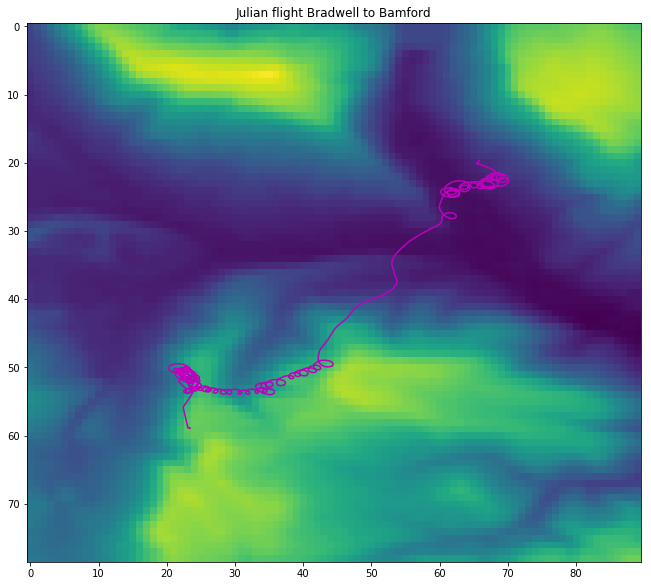

In [44]:
pQ = loaders.GLoadIGC("78RB0912.IGC")
latlngtoxy(pQ)

tp = utils.TerrainPlot(pQ, tiledirectory="/home/julian/hgstuff/hgtterrains")
tp.plotterrain(plt)
tp.plotgps(plt, pQ, "m")
#fd.pQ.alt.plot(); tp.groundlevel(fd.pQ).plot()
plt.title("Julian flight Bradwell to Bamford");

One short thermal up to 680m and then a glide into the valley and an attempt to thermal 100m off the ground

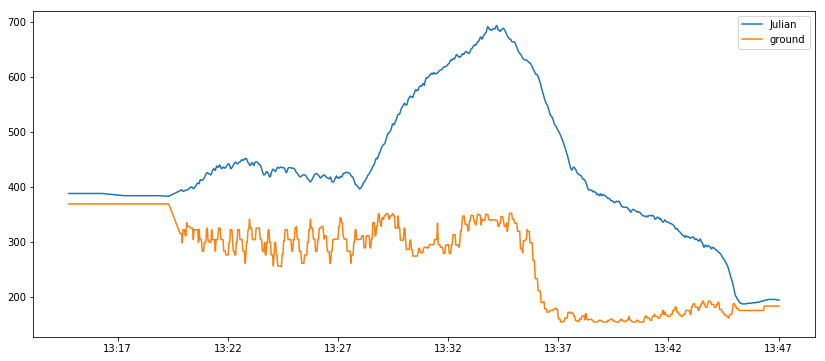

In [19]:
import matplotlib
plt.figure(figsize=(14,6))
plt.plot(pQ.altb, label="Julian"); 
plt.axes().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))
plt.plot(tp.groundlevel(pQ), label="ground");
plt.legend()


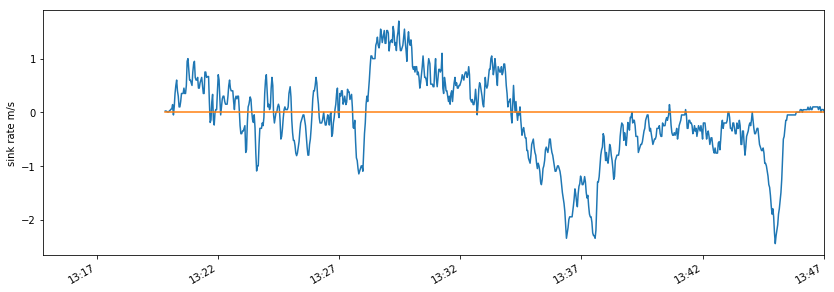

In [23]:
import matplotlib
pQ["t"] = pQ.index
pQ["sr"] = pQ.alt.diff(10) / (pQ["t"].diff(10)/pandas.Timedelta(seconds=1))
plt.figure(figsize=(14,5))
pQ.sr.plot()
plt.plot(pQ.sr*0)
plt.axes().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))
plt.ylabel("sink rate m/s")

This seems to show I was insome light light lift, not strong enough, but did delay the descent considerably


In [27]:
lpQd = loaders.GLoadIGC("darrenbrown 2017-08-13 12_34_30.igc")
latlngtoxy(lpQd);


Meanwhile, Darren's flight earlier in the month which impressed me so much, looked quite a lot less desperate with good height on leaving Bradwell, and enough space to loose >100m on a search loop to the north

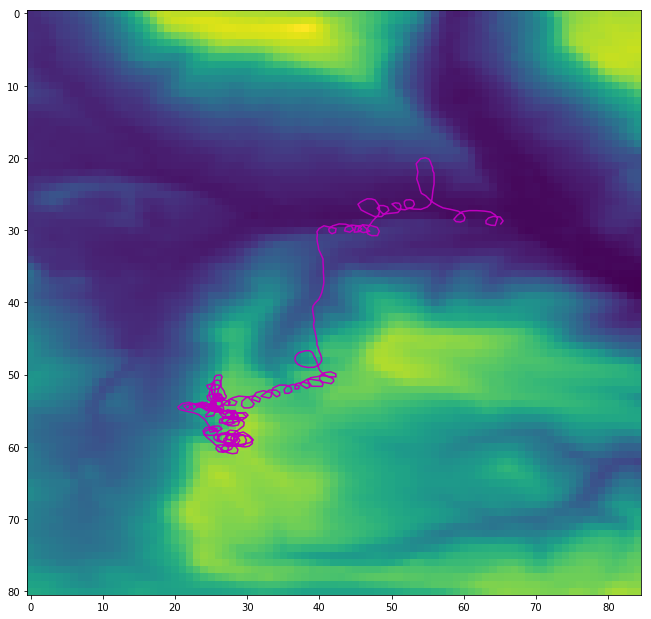

In [35]:
pQd = lpQd.iloc[1000:1680]
tpd = utils.TerrainPlot(pQd)
tpd.plotterrain(plt)
tpd.plotgps(plt, pQd, "m")


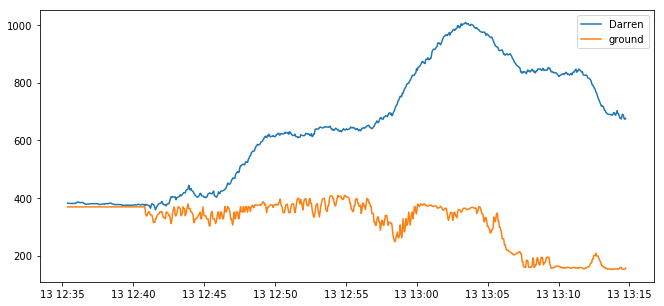

In [37]:
plt.figure(figsize=(11,5))
plt.plot(pQd.altb, label="Darren"); 
plt.plot(tp.groundlevel(pQd), label="ground")
plt.legend()


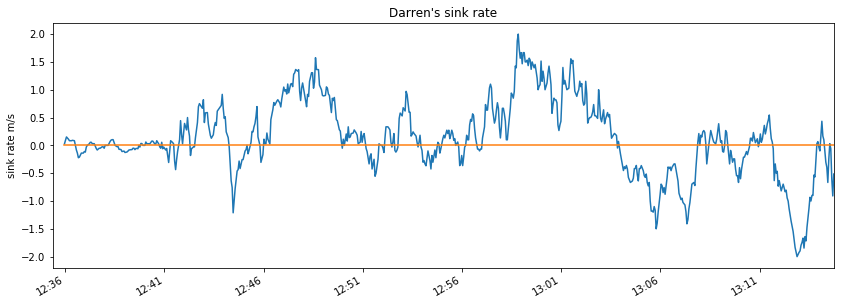

In [42]:
pQ = pQd.copy()
import matplotlib
pQ["t"] = pQ.index
pQ["sr"] = pQ.altb.diff(10) / (pQ["t"].diff(10)/pandas.Timedelta(seconds=1))
plt.figure(figsize=(14,5))
pQ.sr.plot()
plt.plot(pQ.sr*0)
plt.axes().xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))
plt.ylabel("sink rate m/s")
plt.title("Darren's sink rate")